# Prodigy_InfoTech_DS_Task3

Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.


# importing data and arranging them properly

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
data=pd.read_csv("C:\\Users\\KARTHIK M\\Documents\\Internship\\Prodigy InfoTech\\Task 3\\dataset.csv")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# data understanding

In [4]:
data.shape

(41188, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# data preprocessing and EDA

In [7]:
#missing data
missing_data = data.isna().sum()
pd.set_option('display.max_rows', None)
print(missing_data)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [8]:
#categorical variables
obj_col=data.select_dtypes(include=['object']).columns

#continuous variables 
num_col=data.select_dtypes(include=np.number).columns

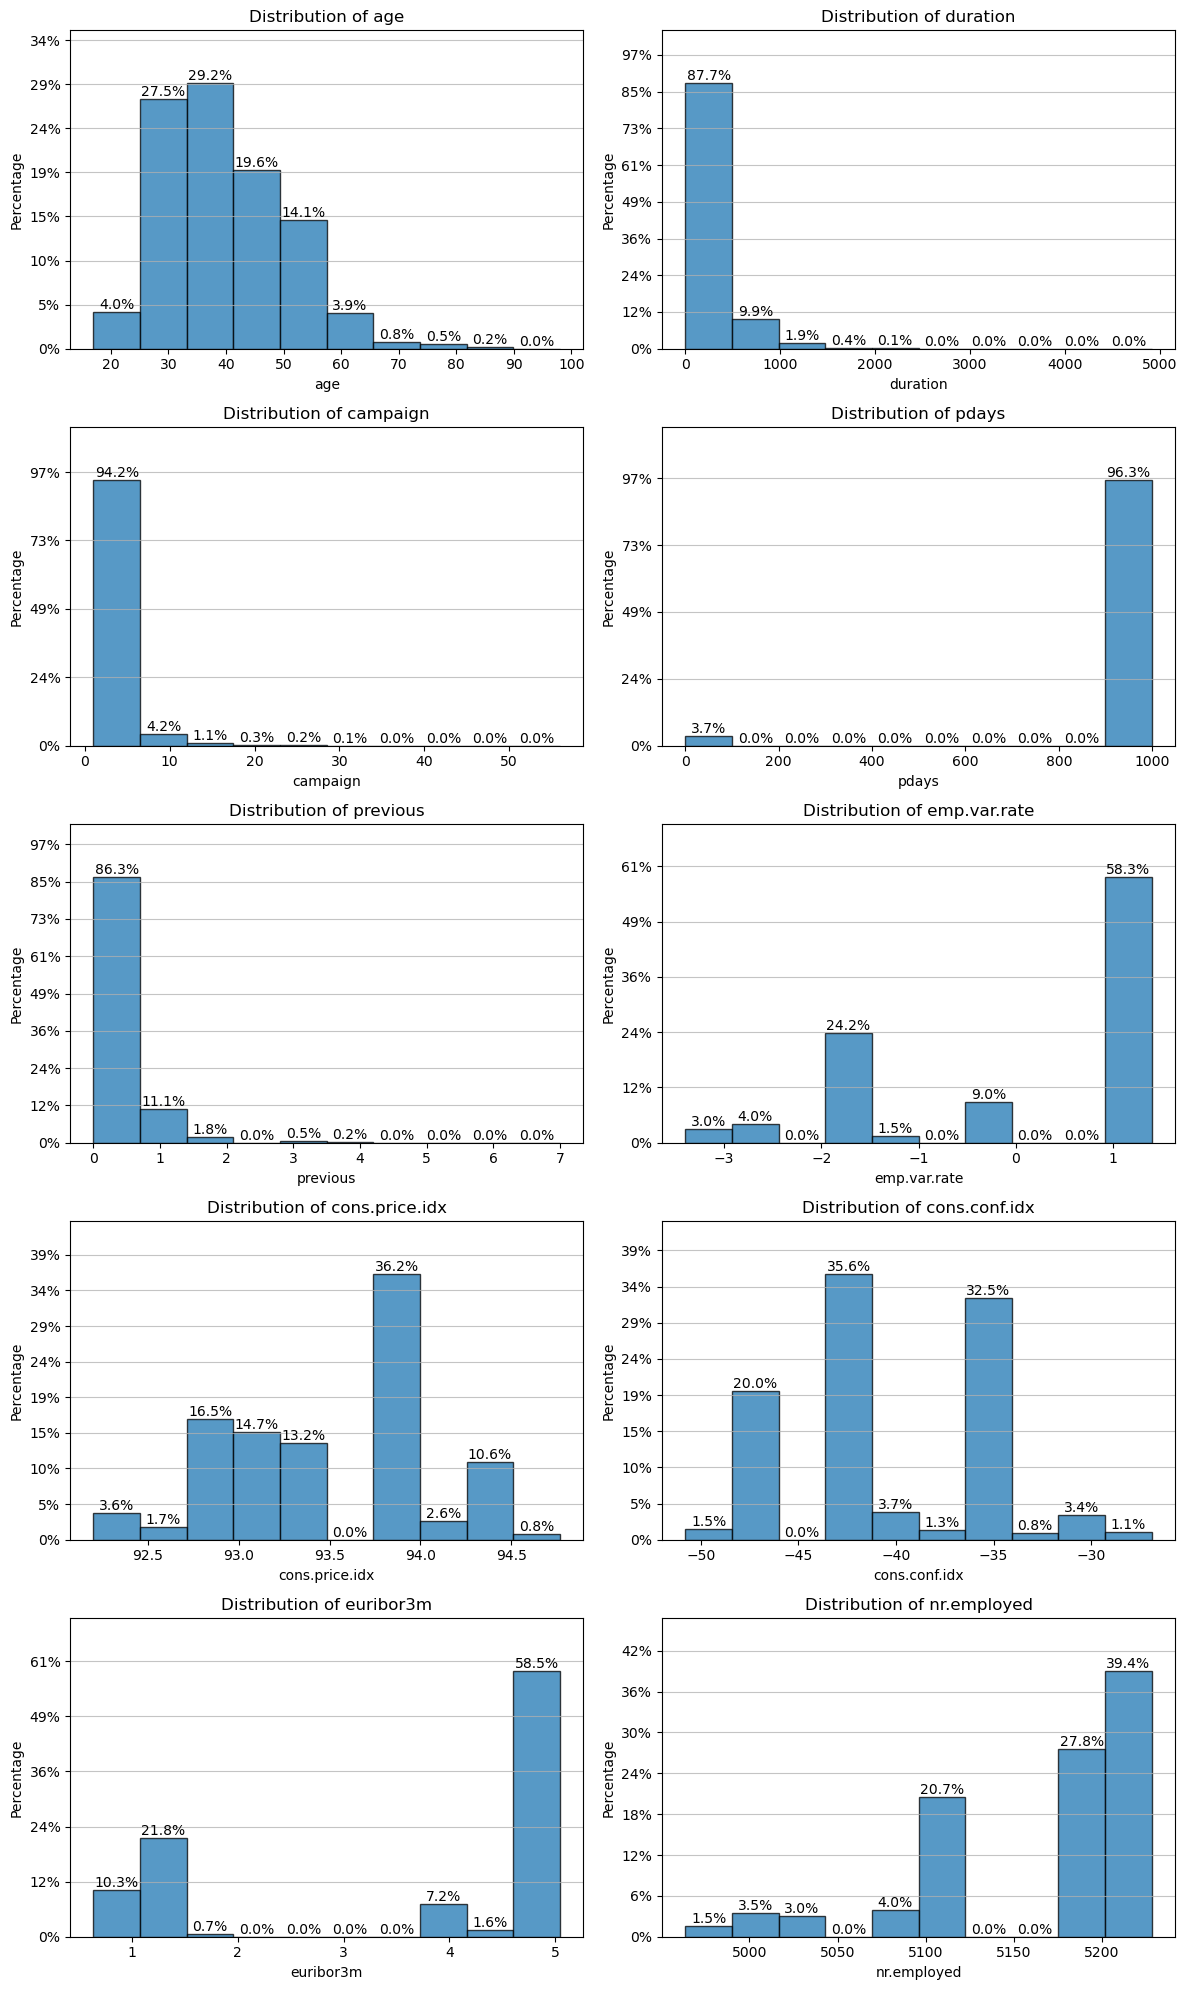

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Number of attributes (continuous variables)
num_attributes = len(num_col)

# Number of columns for subplots
num_cols = 2

# Calculate the number of rows required for the subplots
num_rows = (num_attributes + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 20))

# Plot distribution for each continuous attribute
for i, attribute in enumerate(num_col):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    # Get min and max values for the attribute
    min_value = data[attribute].min()
    max_value = data[attribute].max()
    
    # Plot histogram
    n, bins, patches = ax.hist(data[attribute], bins=10, range=(min_value, max_value), edgecolor='black', alpha=0.75)
    ax.set_xlabel(attribute)
    ax.set_ylabel('Percentage')
    ax.set_title(f'Distribution of {attribute}')
    ax.grid(axis='y', alpha=0.75)
    
    # Add percentage labels to the chart
    total = sum(n)
    for j, patch in enumerate(patches):
        percentage = '{:.1f}%'.format(100 * n[j] / total)
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_height()
        ax.text(x, y, percentage, ha='center', va='bottom')
    
    # Set y-axis ticks as percentages
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:.0%}'.format(y/total)))
    ax.set_ylim(0, max(n)*1.2)

# Adjust layout
plt.tight_layout()
plt.show()


In [10]:
# finding outliers
def detect_outliers_percentage(df, attributes):
    outlier_info = {}
    for column in attributes:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        num_outliers = outliers.shape[0]
        total_values = df[column].shape[0]
        percentage_outliers = (num_outliers / total_values) * 100

        outlier_info[column] = {
            'num_outliers': num_outliers,
            'percentage_outliers': percentage_outliers
        }
    return outlier_info

outlier_info = detect_outliers_percentage(data, num_col)

for attr, info in outlier_info.items():
    print(f"Attribute: {attr}")
    print(f"Number of outliers: {info['num_outliers']}")
    print(f"Percentage of outliers: {info['percentage_outliers']:.2f}%\n")

Attribute: age
Number of outliers: 469
Percentage of outliers: 1.14%

Attribute: duration
Number of outliers: 2963
Percentage of outliers: 7.19%

Attribute: campaign
Number of outliers: 2406
Percentage of outliers: 5.84%

Attribute: pdays
Number of outliers: 1515
Percentage of outliers: 3.68%

Attribute: previous
Number of outliers: 5625
Percentage of outliers: 13.66%

Attribute: emp.var.rate
Number of outliers: 0
Percentage of outliers: 0.00%

Attribute: cons.price.idx
Number of outliers: 0
Percentage of outliers: 0.00%

Attribute: cons.conf.idx
Number of outliers: 447
Percentage of outliers: 1.09%

Attribute: euribor3m
Number of outliers: 0
Percentage of outliers: 0.00%

Attribute: nr.employed
Number of outliers: 0
Percentage of outliers: 0.00%



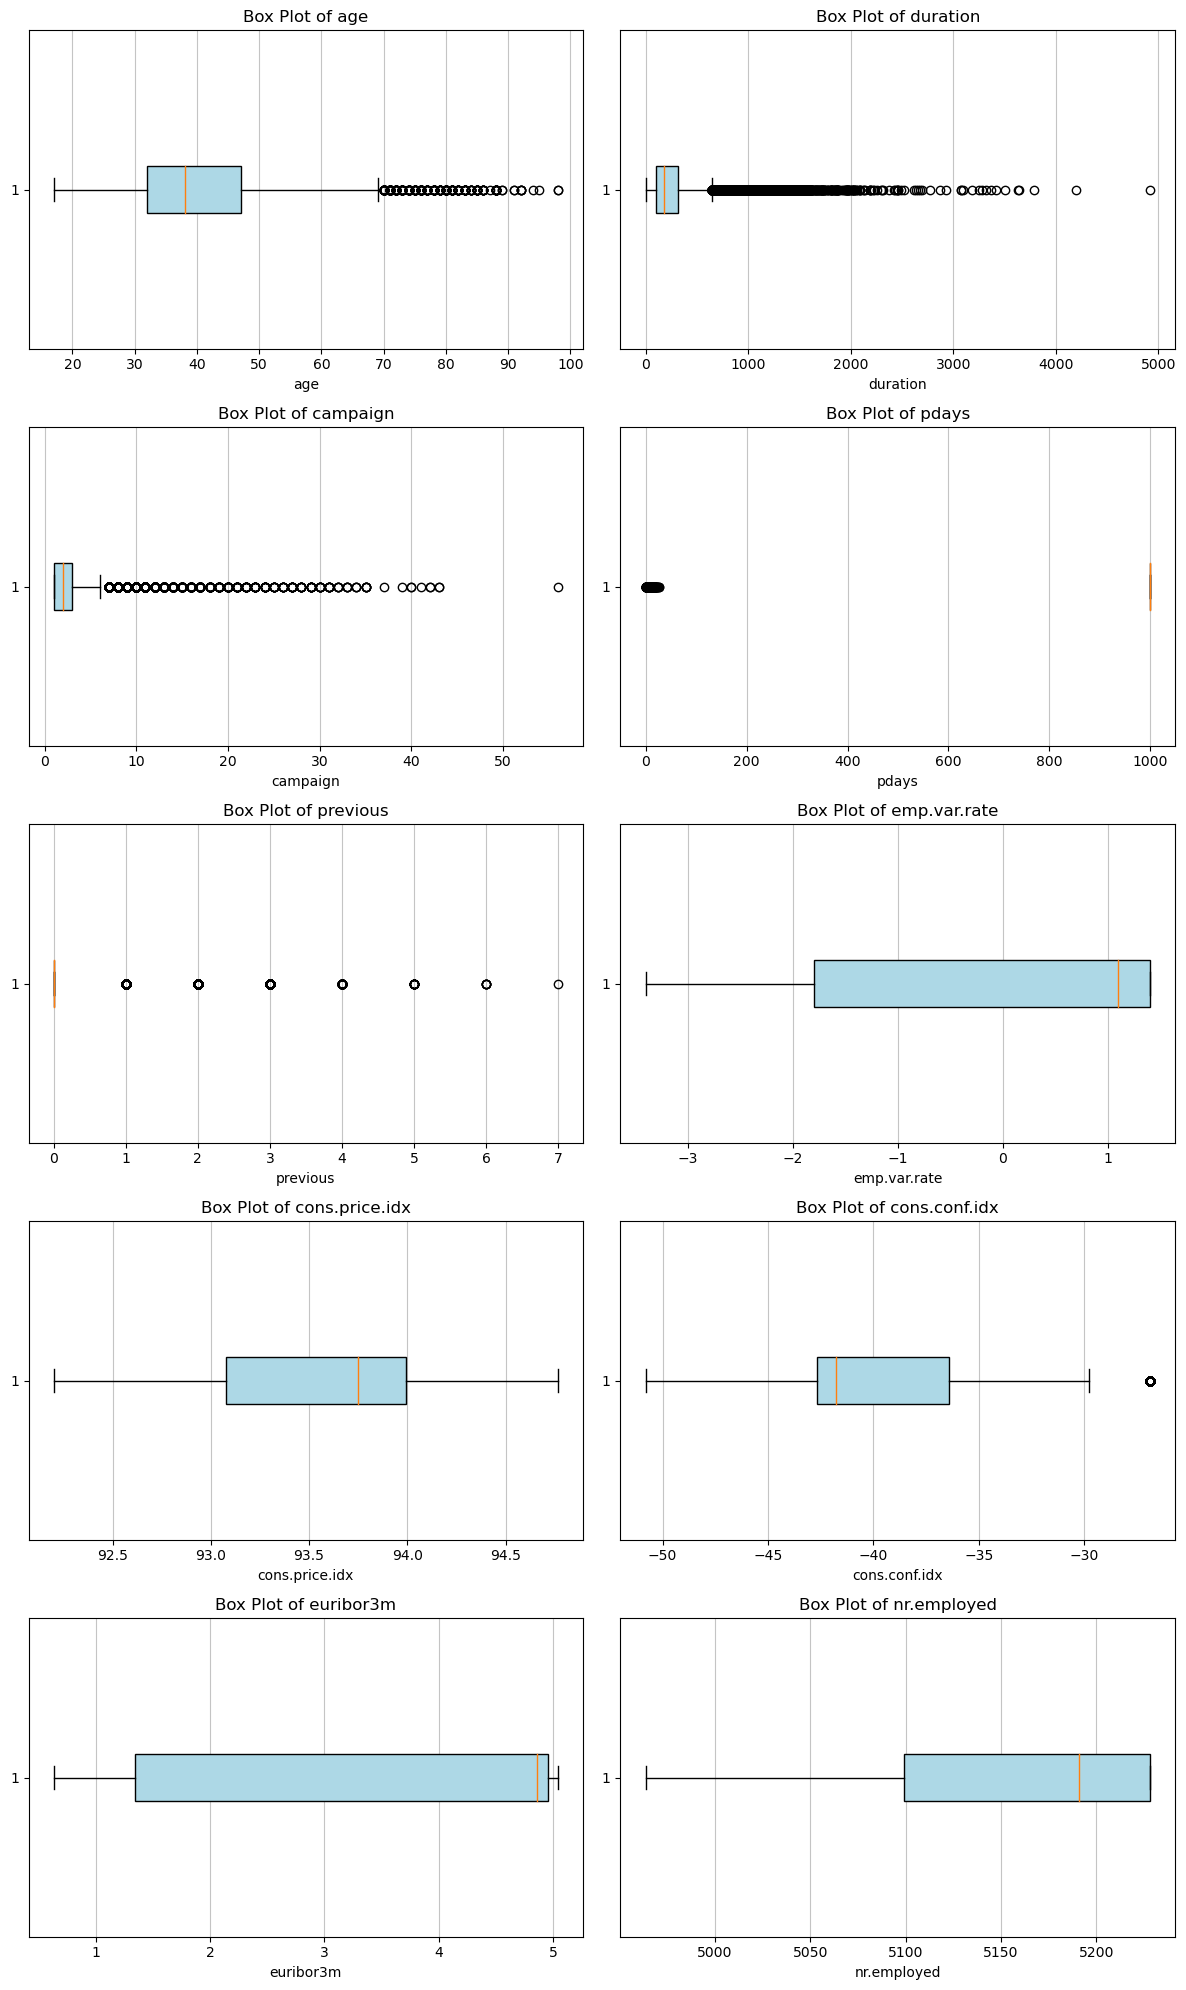

In [11]:

# Number of attributes (continuous variables)
num_attributes = len(num_col)

# Number of columns for subplots
num_cols = 2

# Calculate the number of rows required for the subplots
num_rows = (num_attributes + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 20))

# Flatten axes array for easier indexing if there's more than one row
axes = axes.flatten()

# Plot boxplot for each continuous attribute
for i, attribute in enumerate(num_col):
    ax = axes[i]
    
    # Plot box plot
    ax.boxplot(data[attribute], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    ax.set_xlabel(attribute)
    ax.set_title(f'Box Plot of {attribute}')
    ax.grid(axis='x', alpha=0.75)

# If there are more subplots than attributes, hide the unused axes
for j in range(num_attributes, num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


In [12]:
#Dealing with outliers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
columns = ['age', 'campaign', 'duration']

for column in columns:
    # Calculate Q1 and Q3
    q1 = np.percentile(data[column], 25)
    q3 = np.percentile(data[column], 75)
    # Calculate IQR
    iqr = q3 - q1
    # Determine lower and upper bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    # Calculate mean of the column
    mean_value = data[column].mean()
    # Replace outliers with the mean
    data[column] = np.where((data[column] < lower_bound) | (data[column] > upper_bound), mean_value, data[column])

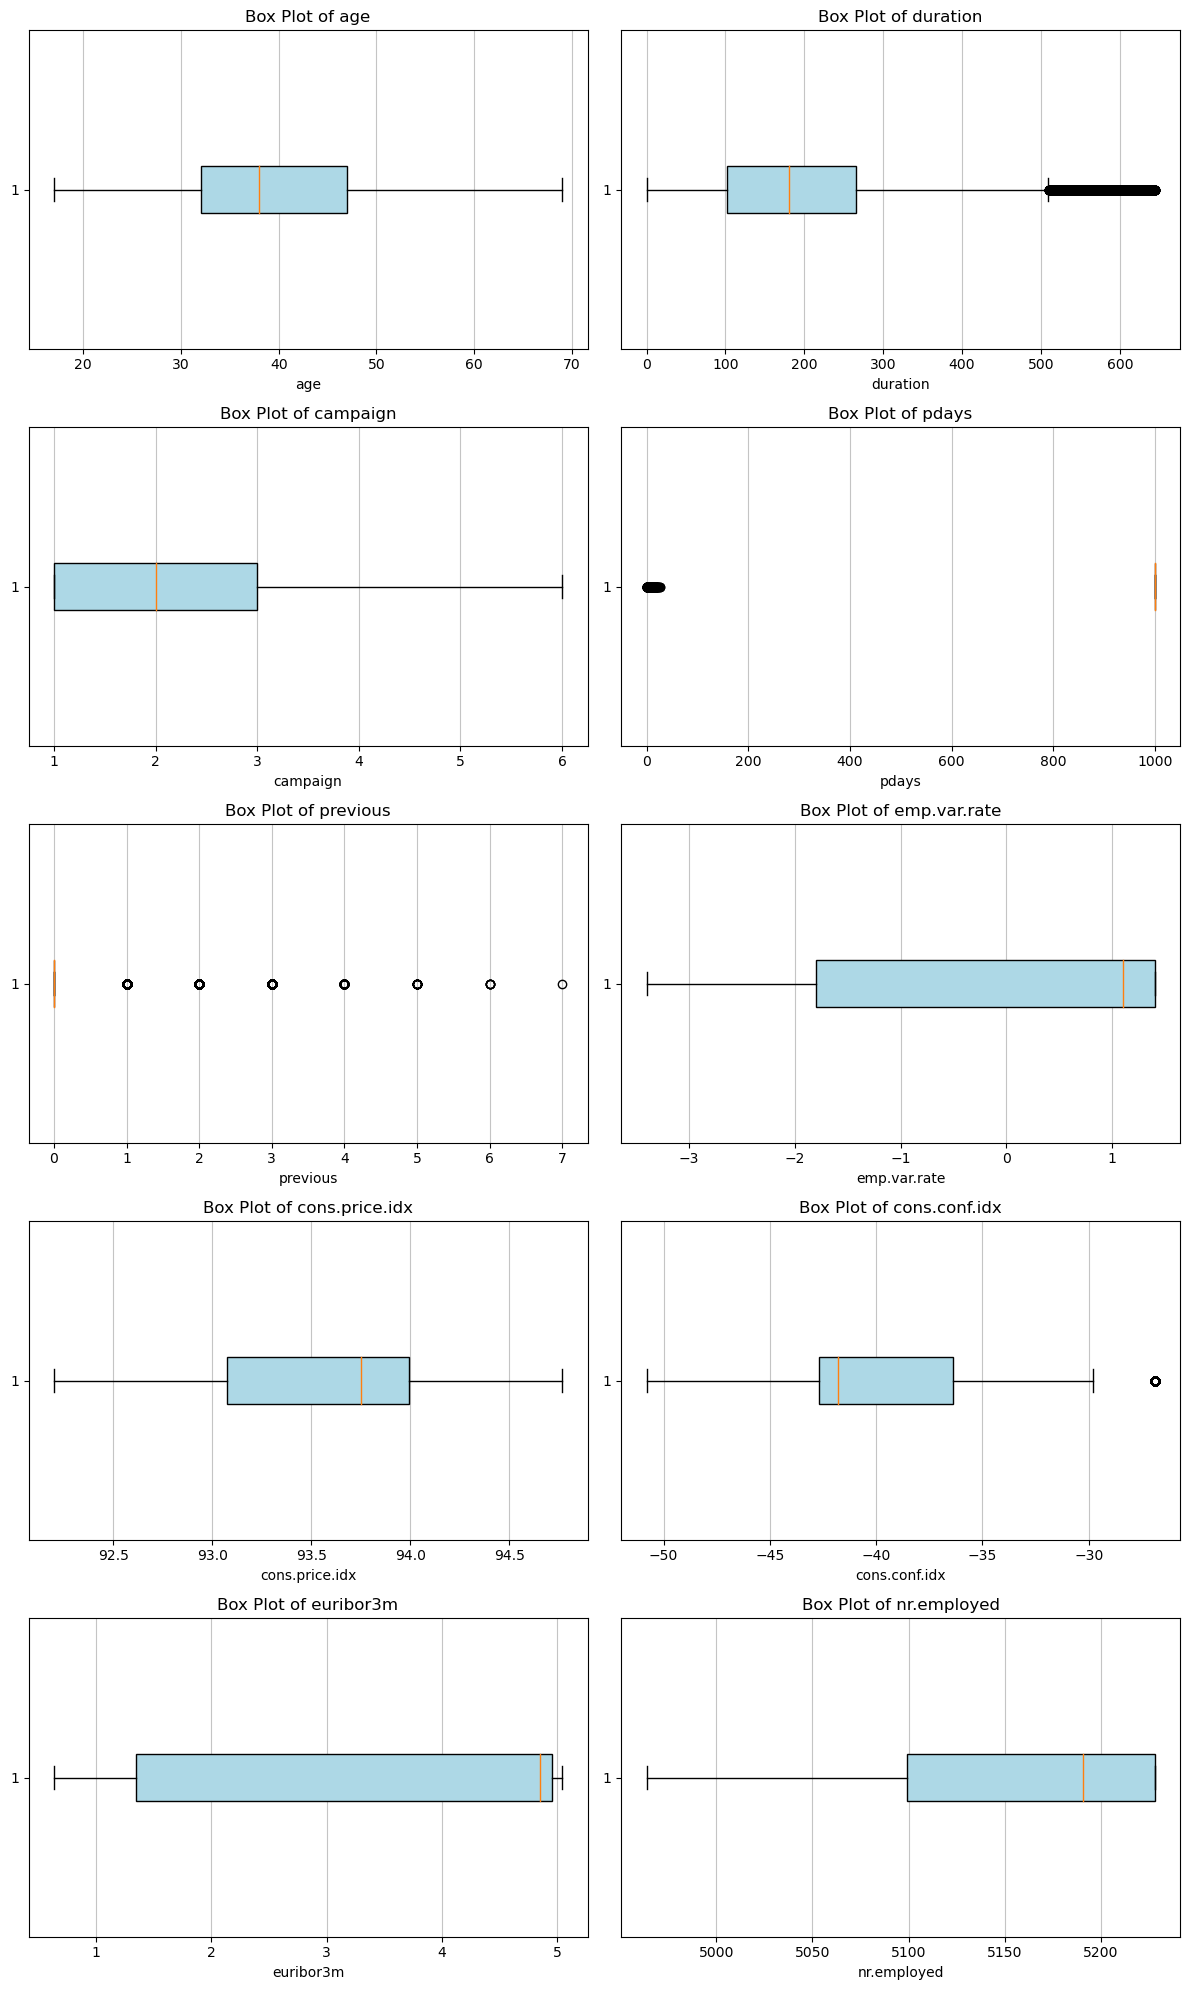

In [13]:

# Number of attributes (continuous variables)
num_attributes = len(num_col)

# Number of columns for subplots
num_cols = 2

# Calculate the number of rows required for the subplots
num_rows = (num_attributes + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 20))

# Flatten axes array for easier indexing if there's more than one row
axes = axes.flatten()

# Plot boxplot for each continuous attribute
for i, attribute in enumerate(num_col):
    ax = axes[i]
    
    # Plot box plot
    ax.boxplot(data[attribute], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    ax.set_xlabel(attribute)
    ax.set_title(f'Box Plot of {attribute}')
    ax.grid(axis='x', alpha=0.75)

# If there are more subplots than attributes, hide the unused axes
for j in range(num_attributes, num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


In [14]:
def detect_outliers_percentage(df, attributes):
    outlier_info = {}
    for column in attributes:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        num_outliers = outliers.shape[0]
        total_values = df[column].shape[0]
        percentage_outliers = (num_outliers / total_values) * 100

        outlier_info[column] = {
            'num_outliers': num_outliers,
            'percentage_outliers': percentage_outliers
        }
    return outlier_info

outlier_info = detect_outliers_percentage(data, columns)

for attr, info in outlier_info.items():
    print(f"Attribute: {attr}")
    print(f"Number of outliers: {info['num_outliers']}")
    print(f"Percentage of outliers: {info['percentage_outliers']:.2f}%\n")

Attribute: age
Number of outliers: 0
Percentage of outliers: 0.00%

Attribute: campaign
Number of outliers: 0
Percentage of outliers: 0.00%

Attribute: duration
Number of outliers: 1803
Percentage of outliers: 4.38%



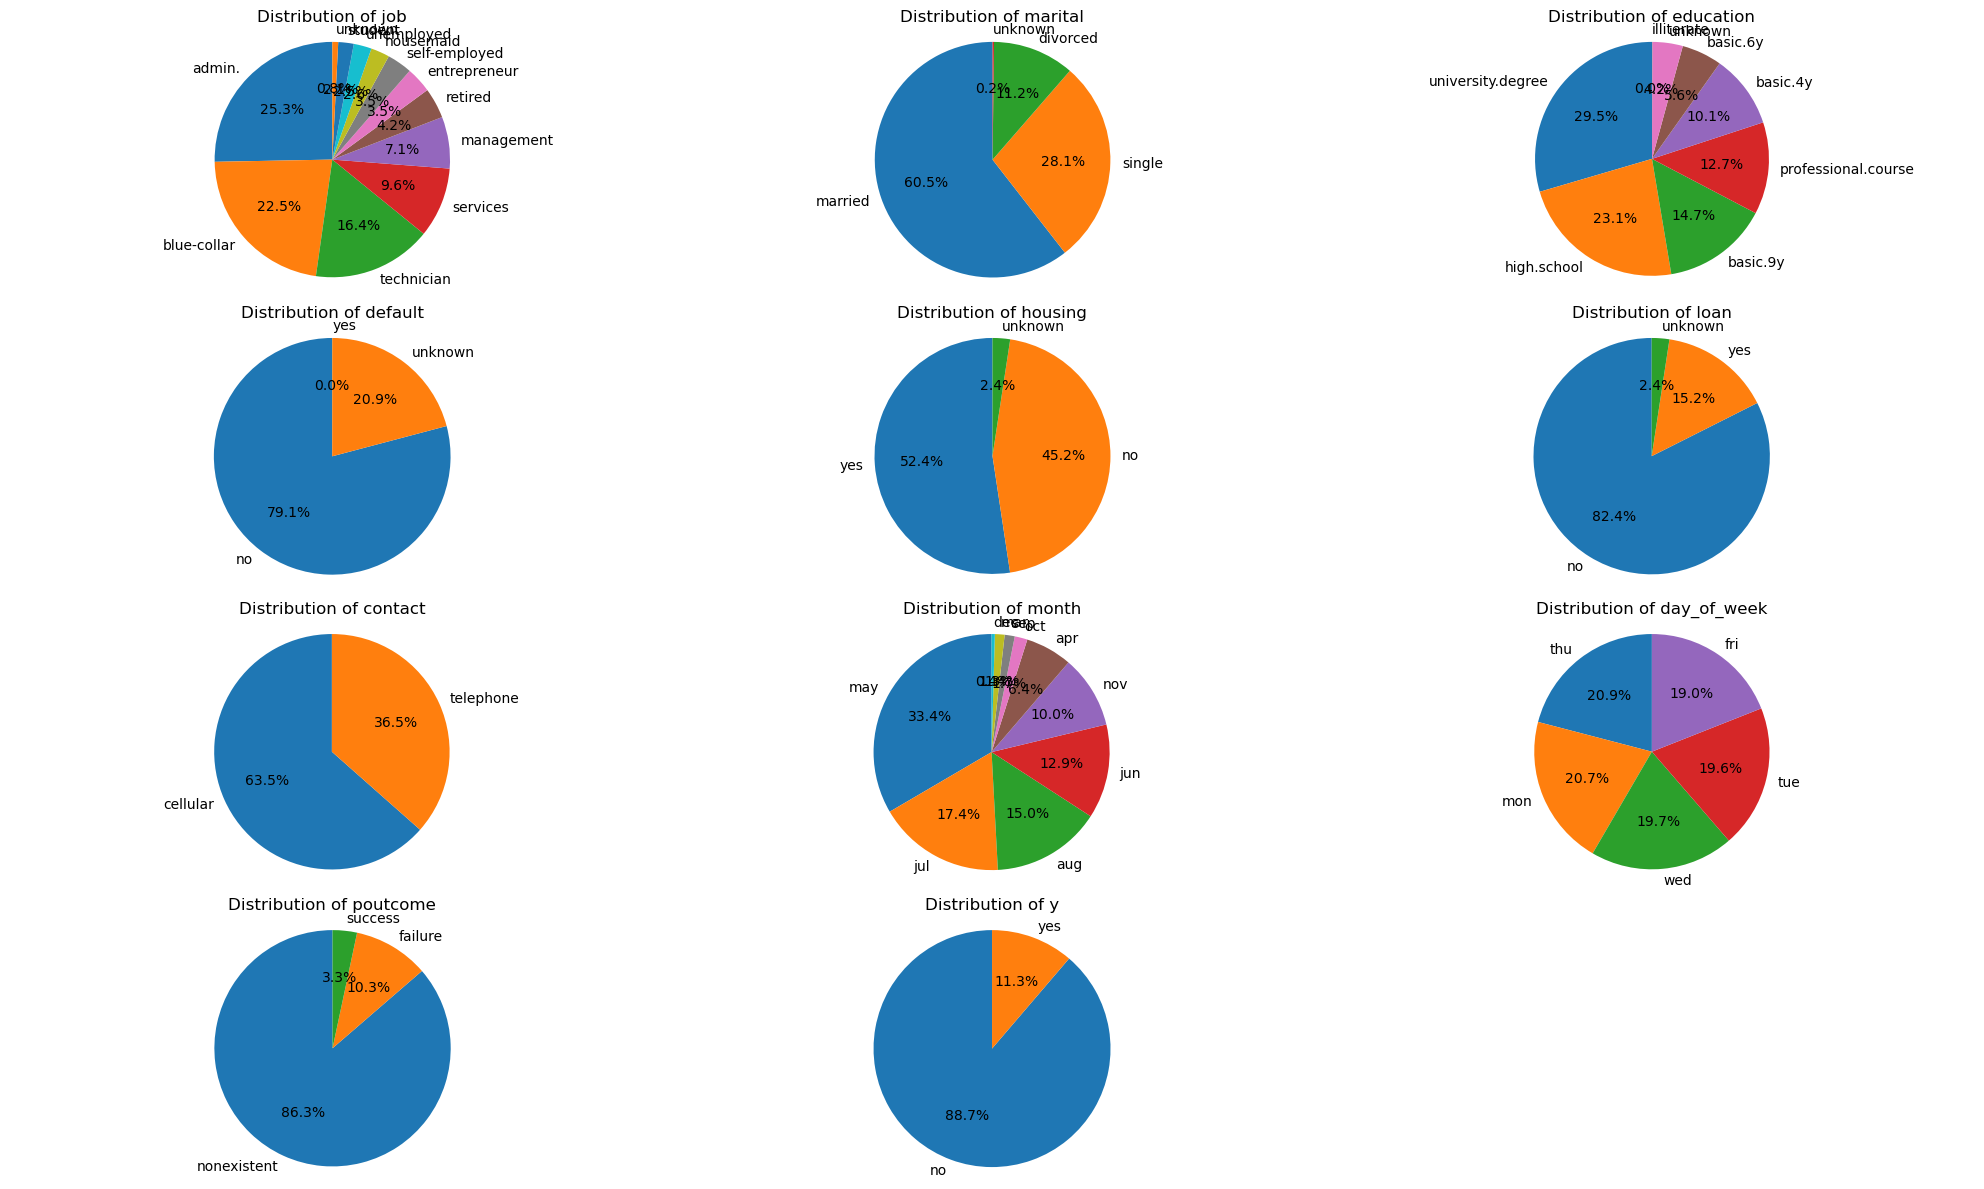

In [15]:
# Calculate the number of rows and columns for subplots
num_attributes = len(obj_col)
num_cols = 3  # Number of columns for subplots
num_rows = (num_attributes + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 12))

# Flatten the axes array if there's only one row of subplots
axes = axes.flatten() if num_attributes > 1 else [axes]

# Plot pie chart for each categorical attribute
for i, attribute in enumerate(obj_col):
    ax = axes[i]
    
    # Count the number of occurrences of each category
    counts = data[attribute].value_counts()
    
    # Create pie chart
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Distribution of {attribute}')
    
    # Equal aspect ratio ensures that pie is drawn as a circle
    ax.axis('equal')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, 'age'),
  Text(1.5, 0, 'duration'),
  Text(2.5, 0, 'campaign'),
  Text(3.5, 0, 'pdays'),
  Text(4.5, 0, 'previous'),
  Text(5.5, 0, 'emp.var.rate'),
  Text(6.5, 0, 'cons.price.idx'),
  Text(7.5, 0, 'cons.conf.idx'),
  Text(8.5, 0, 'euribor3m'),
  Text(9.5, 0, 'nr.employed')])

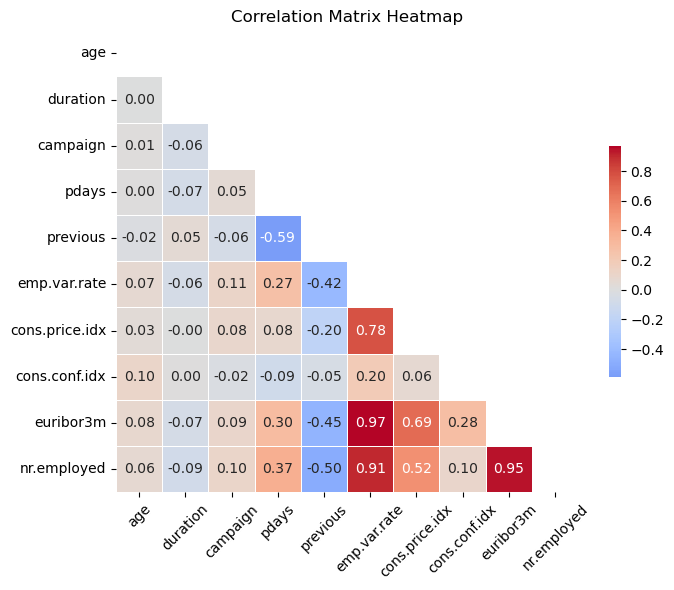

In [16]:
#feature selection
#Calculate correlation matrix
corr_matrix = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(8, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Customize the plot
plt.title('Correlation Matrix Heatmap')
plt.yticks(rotation=0)
plt.xticks(rotation=45)

In [17]:
# Calculate correlation matrix
corr_matrix = data.corr().abs()

# Create a mask to ignore self-correlation (diagonal) and upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Find pairs of highly correlated features
high_corr = (corr_matrix > 0.8) & (corr_matrix < 1.0)  # Adjust the threshold as needed

# Identify pairs of columns to drop
cols_to_drop = set()
for col in high_corr.columns:
    correlated_cols = list(high_corr.index[high_corr[col]])
    if correlated_cols:
        cols_to_drop.add(col)  # Add the first column of the pair
        cols_to_drop.update(correlated_cols)  # Add all correlated columns

# Drop the identified columns from the DataFrame
data=data.drop(columns=cols_to_drop)

# Display which columns are dropped
print(f"Columns dropped: {', '.join(cols_to_drop)}")

data.head()


Columns dropped: nr.employed, euribor3m, emp.var.rate


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1.0,999,0,nonexistent,93.994,-36.4,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,149.0,1.0,999,0,nonexistent,93.994,-36.4,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1.0,999,0,nonexistent,93.994,-36.4,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,151.0,1.0,999,0,nonexistent,93.994,-36.4,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1.0,999,0,nonexistent,93.994,-36.4,no


In [18]:
data.shape

(41188, 18)

# Decision tree

In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

# Initialize OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the categorical columns
data[categorical_cols] = encoder.fit_transform(data[categorical_cols])
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,y
0,56.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,261.0,1.0,999,0,1.0,93.994,-36.4,0.0
1,57.0,7.0,1.0,3.0,1.0,0.0,0.0,1.0,6.0,1.0,149.0,1.0,999,0,1.0,93.994,-36.4,0.0
2,37.0,7.0,1.0,3.0,0.0,2.0,0.0,1.0,6.0,1.0,226.0,1.0,999,0,1.0,93.994,-36.4,0.0
3,40.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6.0,1.0,151.0,1.0,999,0,1.0,93.994,-36.4,0.0
4,56.0,7.0,1.0,3.0,0.0,0.0,2.0,1.0,6.0,1.0,307.0,1.0,999,0,1.0,93.994,-36.4,0.0


In [22]:
#model#
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc,recall_score,precision_score


X = data.drop("y", axis=1)
y = data["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [23]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
# train decision tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

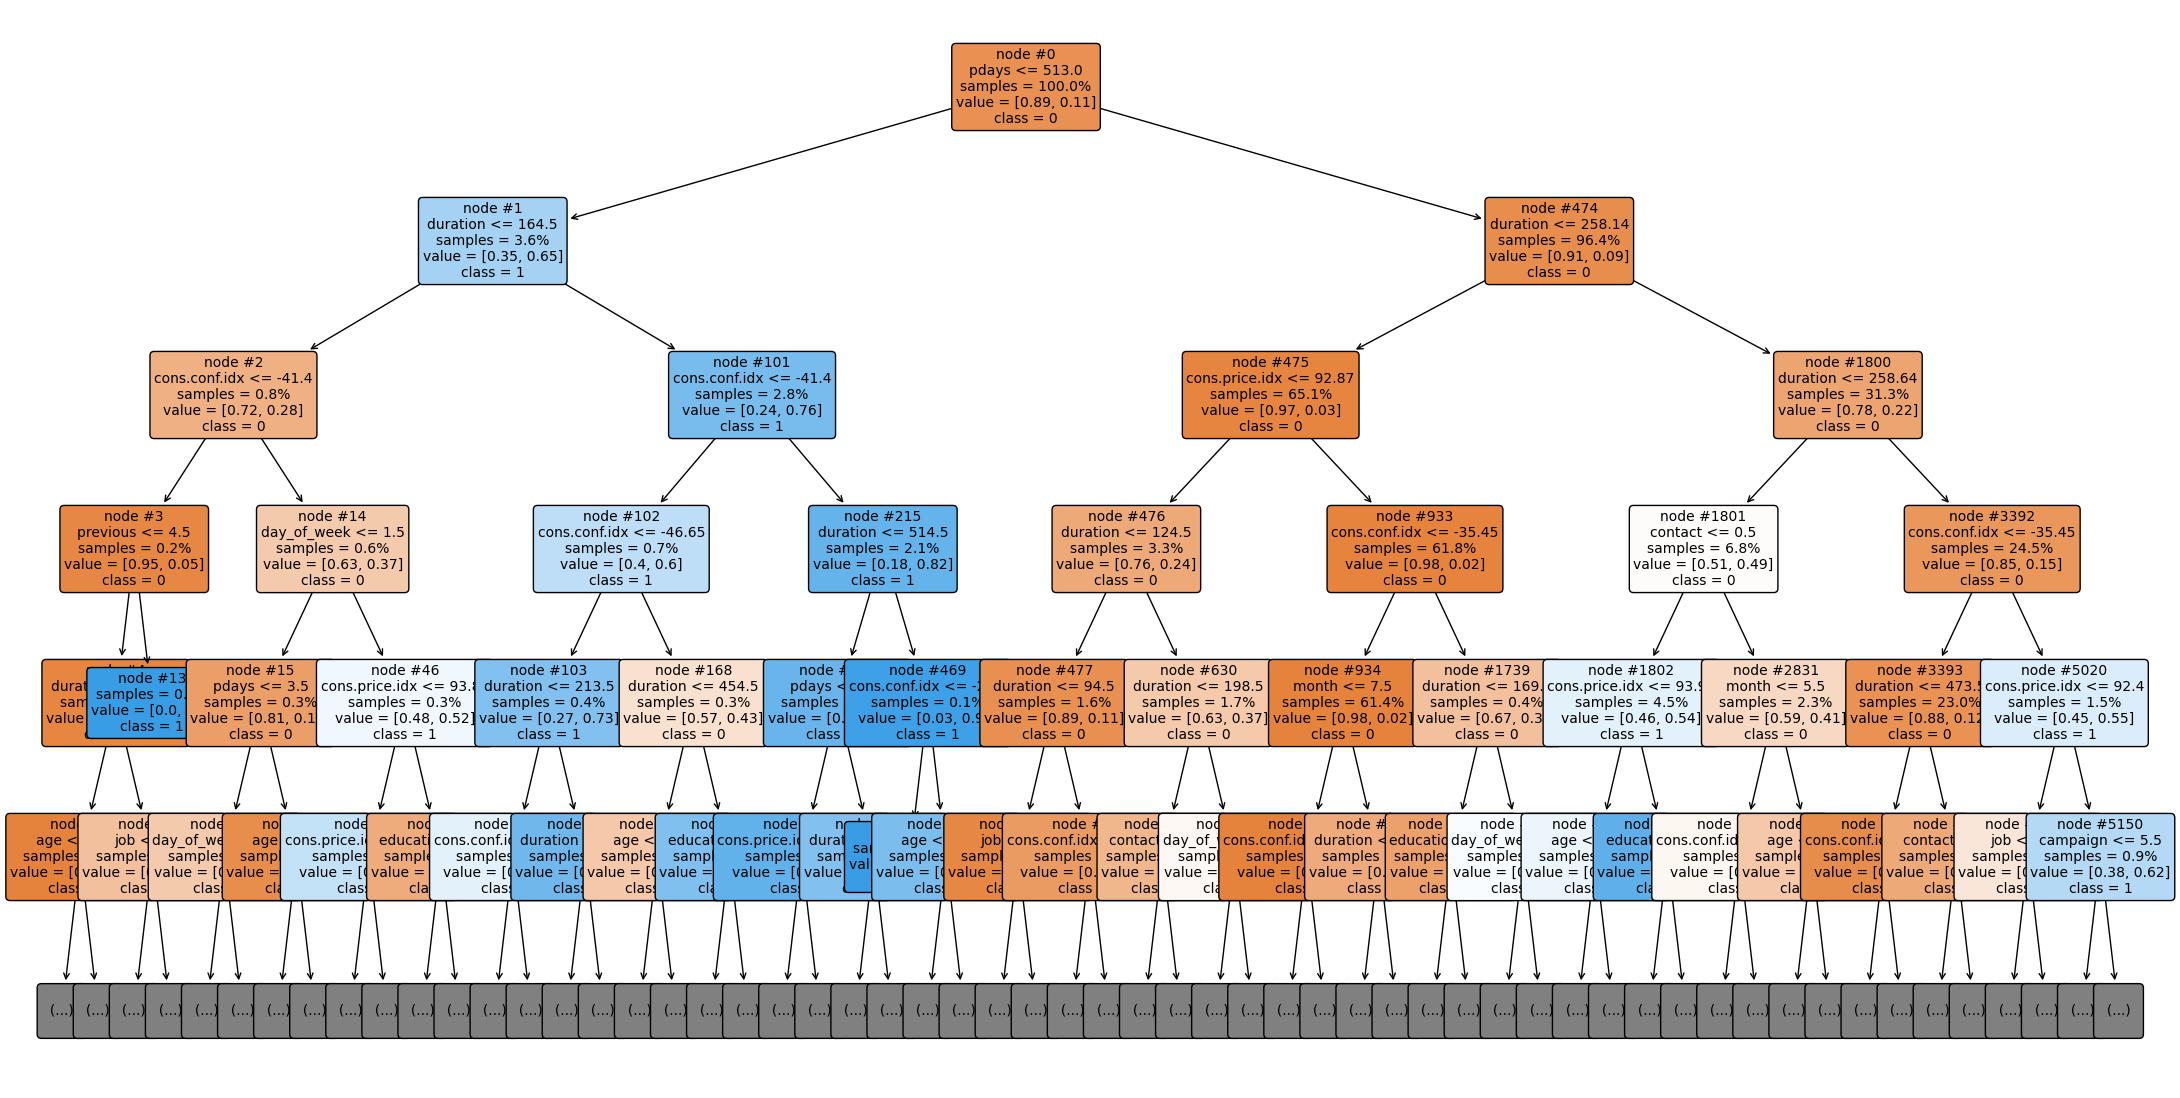

In [27]:
# predict on test set and calculate performance metrics
y_pred2 = dt.predict(X_test)
y_prob2 = dt.predict_proba(X_test)[:, 1]

# plot decision tree diagram

fig, ax = plt.subplots(figsize=(27, 14))
plot_tree(dt, ax=ax, feature_names=X.columns, class_names=["0", "1"], filled=True, fontsize=10, precision=2,
          impurity=False, rounded=True, node_ids=True, proportion=True,max_depth=5)
plt.show()

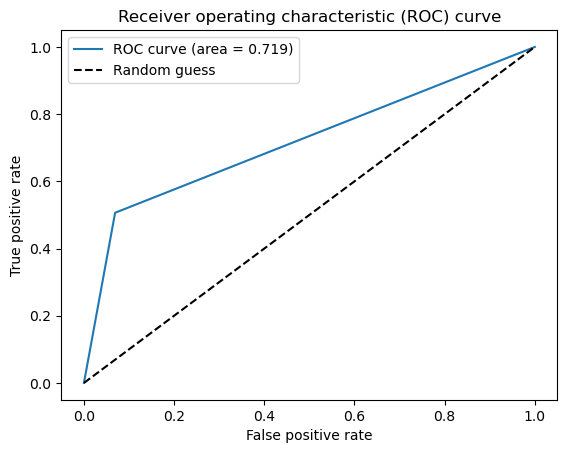

In [28]:
# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob2)

# Calculate the area under the ROC curve
roc_auc2 = auc(fpr, tpr)

# plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc2)
plt.plot([0, 1], [0, 1], 'k--', label="Random guess")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Receiver operating characteristic (ROC) curve")
plt.legend()
plt.show()


Metric                        Value
-------------------------  --------
Sensitivity                0.506505
Specificity                0.930884
Positive Predictive Value  0.480263
Negative Predictive Value  0.937342
Accuracy                   0.883364
Precision                  0.480263


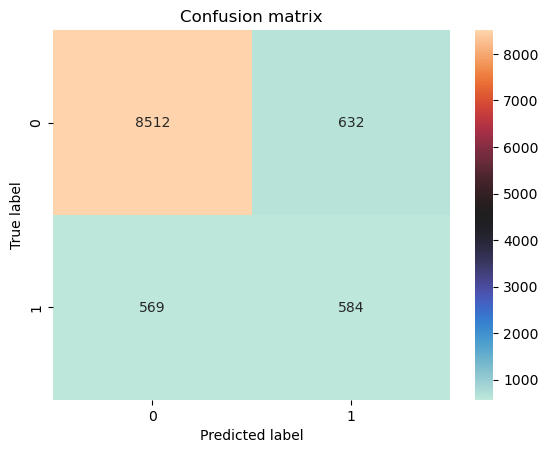

In [29]:
from tabulate import tabulate
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

tn, fp, fn, tp = confusion_matrix(y_test, y_pred2).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
ppv = tp / (tp + fp)
npv = tn / (tn + fn)
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)


table = [["Metric", "Value"],
         ["Sensitivity", sensitivity],
         ["Specificity", specificity],
         ["Positive Predictive Value", ppv],
         ["Negative Predictive Value", npv],
         ["Accuracy", accuracy],
         ["Precision", precision]]

print(tabulate(table, headers="firstrow"))

# Evaluate the performance of the model
# plot the confusion matrix as a heatmap
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, cmap="icefire", fmt="d")
plt.title("Confusion matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()